[<img src="images/front_page.jpg" width="900" target="_blank" alt="Click to go to this project's GitHub repository" title="Click to go to this project's GitHub repository"/>](https://github.com/AAZG/Binary-Classification-Implementation-in-Breast-Cancer)

# Binary Classification Implementation in Breast Cancer

## About The Dataset :-
### Context

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


<p>
  Enlace to <a
    href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"
    title="The best place to find dataset and learn data science"
    >Dataset in Kaggle</a
  >.
</p>

[<img src="images/image1.png" target="_blank" alt="Click to go to dataset in Kaggle" title="Click to go to dataset in Kaggle"/>](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

### Content
#### Attributes
##### Characteristics Identification
1. ID number
2. Diagnosis (The diagnosis of breast tissues (M = malignant, B = benign))

##### The mean

1. radius_mean (mean of distances from center to points on the perimeter)
2. texture_mean (standard deviation of gray-scale values)
3. perimeter_mean *
4. area_mean *
5. smoothness_mean (local variation in radius lengths)
6. compactness_mean (perimeter^2 / area - 1.0) 
7. concavity_mean (severity of concave portions of the contour)
8. concave points_mean (number of concave portions of the contour)
9. symmetry_mean
10. fractal dimension_mean ("coastline approximation" - 1)

##### Standard error
1. radius_se (standard error for the mean of distances from center to points on the perimeter)
2. texture_se (standard error for the standard deviation of gray-scale values)
3. perimeter_se *
4. area_se *
5. smoothness_se (standard error for the local variation in radius lengths)
6. compactness_se (standard error for the perimeter^2 / area - 1.0) 
7. concavity_se (standard error for the severity of concave portions of the contour)
8. concave points_se (standard error for the number of concave portions of the contour)
9. symmetry_se
10. fractal dimension_se (standard error for the "coastline approximation" - 1)

##### "worst" or largest (mean of the three largest values)
1. radius_worst ("worst" or largest mean value for mean of distances from center to points on the perimeter)
2. texture_worst ("worst" or largest mean value for standard deviation of gray-scale values)
3. perimeter_worst *
4. area_worst *
5. smoothness_worst ("worst" or largest mean value for local variation in radius lengths)
6. compactness_worst ("worst" or largest mean value for perimeter^2 / area - 1.0) 
7. concavity_worst ("worst" or largest mean value for severity of concave portions of the contour)
8. concave points_worst ("worst" or largest mean value for number of concave portions of the contour)
9. symmetry_worst
10. fractal dimension_worst ("worst" or largest mean value for "coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In the Attributes:
<br>- The variables radius, area and perimeter present a quasi-collinearity relationship between them. This is because for circular figures the perimeter is equal to PI times two times the radius. Area is equal to PI times radius squared. Pi is a constant, but area and perimeter are dependent on the variable radius. Possibly the compactness variable also presents this case since it is equal to 'perimeter^2 / area - 1.0', but this will also be reviewed in depth in the EDA.
<br>-Quasi-collinearity, or by extension, simply collinearity in which some variable is "almost" a linear combination of another or others, or in other words, some simple or multiple correlation coefficients between the independent variables are close to 1, although they do not reach to that value.
<br>- In this case the matrix X'X is quasi-singular, that is, its determinant is not zero but it is very small. Since in order to invert a matrix it is necessary to divide by its determinant, in this situation problems of precision arise in the estimation of the coefficients, since matrix inversion algorithms lose precision when having to divide by a very small number, being also unstable.
<br>- Previously we believe that some of these variables will not contribute anything to the construction of the model. So maybe we can remove them later.
></ul>
></div>

<p>
  Enlace to
  <a
    href="http://www.hrc.es/bioest/Reglog_8.html"
    title="Document with data science information"
    >document collinearity</a
  >.
</p>

### Target
Need to carry out a classification to determine the Diagnosis of mammary tissues of future patients with tumors.

## Import library

In [1]:
!python -m pip install -q --upgrade pip
!pip install -q -r requirements.txt

In [2]:
# Miscellaneous
from __future__ import print_function
from IPython.display import display

#Importing Requierd Libraries
import pandas as pd 
import numpy as np

# For interactive graphics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from ydata_profiling import ProfileReport
from yellowbrick.classifier import ClassPredictionError
from tqdm.notebook import trange, tqdm

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, f1_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, ShuffleSplit, LearningCurveDisplay
from imblearn.pipeline import Pipeline
## Algorithms for Binary Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
## Visualization of Decision Tree
from sklearn.tree import plot_tree, export_text

# Magics Funtions
%load_ext autoreload
%autoreload 2
%run "template_visualitation.ipynb"
%run "pandas-missing-extension.ipynb"

## Data upload

In [3]:
df_data = pd.read_csv('data.csv', index_col=None, delimiter=',', encoding='utf-8')

### Convert to Feather to reduce load + save of DataFrame

In [4]:
df_data.to_feather("data.feather")

In [5]:
df_data = pd.read_feather("data.feather")

In [6]:
df_data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
df_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At first glance at the data:
<br>- There are 569 entries and 33 columns, one column is a customer id;
<br>- The column 'Unnamed: 32' is empty, it will be removed later.
<br>- No duplicate values, no errors, no missing values (at first glance);
<br>- There are some columns, whose data types need to be changed, for example, the target variable to numeric.<br>
In the next step, we'll study and preprocess outliers, rename columns, and change data types.
></ul>
></div>

### Memory Reduction to DataFrame

In [8]:
memory_usage = df_data.memory_usage(deep=True) / 1024 ** 2
print(f'memory usage of features:\n{memory_usage.head(7)}')
print('memory usage sum:',memory_usage.sum())

memory usage of features:
Index             0.000122
id                0.004341
diagnosis         0.031473
radius_mean       0.004341
texture_mean      0.004341
perimeter_mean    0.004341
area_mean         0.004341
dtype: float64
memory usage sum: 0.17051124572753906


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined column:
<br>- Although we have already optimized the loading time of the dataset quite a lot using the .feather format, we can also optimize the size in memory with a small python script. We will apply this function to our dataset every time we apply some format or transformation that changes its size.
></ul>
></div>

In [9]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

df_data = reduce_memory_usage(df_data, verbose=True)

Mem. usage decreased to 0.04 Mb (69.6% reduction)


In [10]:
df_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int32  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float16
 3   texture_mean             569 non-null    float16
 4   perimeter_mean           569 non-null    float16
 5   area_mean                569 non-null    float16
 6   smoothness_mean          569 non-null    float16
 7   compactness_mean         569 non-null    float16
 8   concavity_mean           569 non-null    float16
 9   concave points_mean      569 non-null    float16
 10  symmetry_mean            569 non-null    float16
 11  fractal_dimension_mean   569 non-null    float16
 12  radius_se                569 non-null    float16
 13  texture_se               569 non-null    float16
 14  perimeter_se             5

## Elimination of redundant variables and column empty

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int32  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float16
 3   texture_mean             569 non-null    float16
 4   perimeter_mean           569 non-null    float16
 5   area_mean                569 non-null    float16
 6   smoothness_mean          569 non-null    float16
 7   compactness_mean         569 non-null    float16
 8   concavity_mean           569 non-null    float16
 9   concave points_mean      569 non-null    float16
 10  symmetry_mean            569 non-null    float16
 11  fractal_dimension_mean   569 non-null    float16
 12  radius_se                569 non-null    float16
 13  texture_se               569 non-null    float16
 14  perimeter_se             5

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At first glance at the data:
<br>- Next, we will remove some of the variable columns that do not provide information. These columns include 'Unnamed: 32' and 'id'.
></ul>
></div>

In [12]:
df_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

## Data cleaning and manipulation

### Convert categorical variables to numeric

In [13]:
df_data_processing = df_data.copy()

In [14]:
df_data_processing.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At first glance at the data:
<br>- We must replace our target variable with a binary variable.
></ul>
></div>

In [15]:
df_data_processing.diagnosis = df_data.diagnosis.replace(["M", "B"], [1, 0])

In [16]:
df_data_processing.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Missing imputation

In [17]:
df_data_processing.missing.missing_variable_summary()

variable  n_missing  n_cases  pct_missing
0                 diagnosis          0      569          0.0
1               radius_mean          0      569          0.0
2              texture_mean          0      569          0.0
3            perimeter_mean          0      569          0.0
4                 area_mean          0      569          0.0
5           smoothness_mean          0      569          0.0
6          compactness_mean          0      569          0.0
7            concavity_mean          0      569          0.0
8       concave points_mean          0      569          0.0
9             symmetry_mean          0      569          0.0
10   fractal_dimension_mean          0      569          0.0
11                radius_se          0      569          0.0
12               texture_se          0      569          0.0
13             perimeter_se          0      569          0.0
14                  area_se          0      569          0.0
15            smoothness_se          0      569          0.0
16           compactness_se          0      569          0.0
17             concavity_se          0      569          0.0
18        concave points_se          0      569          0.0
19              symmetry_se          0      569          0.0
20     fractal_dimension_se          0      569          0.0
21             radius_worst          0      569          0.0
22            texture_worst          0      569          0.0
23          perimeter_worst          0      569          0.0
24               area_worst          0      569          0.0
25         smoothness_worst          0      569          0.0
26        compactness_worst          0      569          0.0
27          concavity_worst          0      569          0.0
28     concave points_worst          0      569          0.0
29           symmetry_worst          0      569          0.0
30  fractal_dimension_worst          0      569          0.0

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At first glance at the data:
<br>- There is no missing data.
></ul>
></div>

### Duplicate data handling

In [18]:
df_data_processing[df_data_processing.duplicated()]

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]

In [19]:
df_data_processing.duplicated().value_counts()

False    569
dtype: int64

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We have no duplicate values.
></ul>
></div>

### Number of unique values present in each column

In [20]:
df_data_processing.nunique()

diagnosis                    2
radius_mean                443
texture_mean               434
perimeter_mean             448
area_mean                  495
smoothness_mean            383
compactness_mean           508
concavity_mean             521
concave points_mean        518
symmetry_mean              403
fractal_dimension_mean     366
radius_se                  510
texture_se                 503
perimeter_se               521
area_se                    509
smoothness_se              489
compactness_se             527
concavity_se               514
concave points_se          488
symmetry_se                474
fractal_dimension_se       516
radius_worst               440
texture_worst              464
perimeter_worst            450
area_worst                 490
smoothness_worst           384
compactness_worst          514
concavity_worst            524
concave points_worst       481
symmetry_worst             421
fractal_dimension_worst    410
dtype: int64

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We present diversity in our variables.
></ul>
></div>

In [21]:
df_data_processing = reduce_memory_usage(df_data_processing, verbose=True)
df_data_processing.info()

Mem. usage decreased to 0.03 Mb (10.3% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int8   
 1   radius_mean              569 non-null    float16
 2   texture_mean             569 non-null    float16
 3   perimeter_mean           569 non-null    float16
 4   area_mean                569 non-null    float16
 5   smoothness_mean          569 non-null    float16
 6   compactness_mean         569 non-null    float16
 7   concavity_mean           569 non-null    float16
 8   concave points_mean      569 non-null    float16
 9   symmetry_mean            569 non-null    float16
 10  fractal_dimension_mean   569 non-null    float16
 11  radius_se                569 non-null    float16
 12  texture_se               569 non-null    float16
 13  perimeter_se             569 n

## EDA

### Univariate analysis with Pandas Profiling library

In [22]:
profile = ProfileReport(
    df_data_processing, title="Pandas Profiling Report", html={"style": {"primary_color": "#FA0087"}},
    minimal=True
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>-  Diagnosis - 2 classed
<br>
<br>-  radius_mean - bimodal distribution
<br>-  texture_mean - symmetrical  distribution
<br>-  perimeter_mean - bimodal distribution
<br>-  area_mean - bimodal distribution
<br>-  smoothness_mean - symmetrical distribution
<br>-  compactness_mean - right asymmetric distribution
<br>-  concavity_mean - right asymmetric distribution
<br>-  concave_points_mean -  right asymmetric distribution
<br>-  symmetry_mean - symmetrical distribution
<br>-  fractal_dimension_mean - symmetrical distribution
<br>    
<br>-  radius_se - right asymmetric distribution
<br>-  texture_se - right asymmetric distribution
<br>-  perimeter_se - right asymmetric distribution distribution
<br>-  area_se - right asymmetric distribution distribution
<br>-  smoothness_se - right asymmetric distribution distribution
<br>-  compactness_se - right asymmetric distribution
<br>-  concavity_se - right asymmetric distribution
<br>-  concave_points_se -  right asymmetric distribution
<br>-  symmetry_se - right asymmetric distribution distribution
<br>-  fractal_dimension_se - right asymmetric distribution distribution
<br>
<br>-  radius_worst - bimodal distribution
<br>-  texture_worst - symmetrical  distribution
<br>-  perimeter_worst - bimodal distribution
<br>-  area_worst - bimodal distribution
<br>-  smoothness_worst - symmetrical distribution
<br>-  compactness_worst - right asymmetric distribution
<br>-  concavity_worst - right asymmetric distribution
<br>-  concave_points_worst -  bimodal distribution
<br>-  symmetry_worst - symmetrical distribution
<br>-  fractal_dimension_worst - right asymmetric distribution
></ul>
></div>

### Distribution Analysis

In [23]:
columns_numeric = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [24]:
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 10, 'color': 'white'}

# plotly setup
plot_rows=5
plot_cols=6
fig = make_subplots(rows=plot_rows, cols=plot_cols, shared_yaxes=False)
# add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=df_data_processing[columns_numeric[x]].values,
                             name = df_data_processing[columns_numeric].columns[x],
                            ),
                     row=i,
                     col=j)
        x=x+1
fig.update_layout(
    width=1500,
    height=1200)

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We detected two possible outliers in the 'area' column, but they could be large tumors, it will be assumed that the doctors performed the measurement correctly.
></ul>
></div>

### Percentage analysis of categorical variables:

In [25]:
columns_categorical = ['diagnosis']

In [26]:
from plotly.subplots import make_subplots

pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 10, 'color': 'white'}



# plotly setup
plot_rows=1
plot_cols=1
fig = make_subplots(rows=plot_rows, 
                    cols=plot_cols, 
                    shared_yaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=('1', '2', '3', '4'),
                    specs=[[{'type':'domain'}]]
                   )
# add traces
x = 0
names = {}
count = 1
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig1 = px.pie(df_data_processing, values='area_mean', names=columns_categorical[x])

        trace1 = fig1.data[0]
        fig.add_trace(trace1,
                     row=i,
                     col=j)
        names[str(count)]=columns_categorical[x]
        x=x+1
        count = count + 1

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_layout(width=600, height=400)
fig.update_annotations(y=1.1)

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We can appreciate that our target variable is a bit unbalanced.
></ul>
></div>

### Correlation Analysis

In [27]:
data_corre = df_data_processing.corr()['diagnosis'].sort_values(ascending=True).reset_index()

In [28]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=data_corre['index'],
        y=data_corre['diagnosis'], opacity=0.8,
        marker=dict(cmax=1, cmin=-1, color=data_corre['diagnosis'], showscale=True, colorbar={"title": "Correlation"})))

fig.update_xaxes(tickangle=60, tickfont=dict(size=10), automargin='height')
fig.update_layout(title_text='Graphic correlation variable diagnosis', xaxis_title="Feature", yaxis_title="Correlation", coloraxis_colorbar_title_text = 'your title')
fig.show()

In [29]:
df_data_processing.corr().style.background_gradient(cmap="coolwarm", axis=None).format('{:.2f}')



><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We can see that some variables present Quasi-collinearity, so we will analyze those with the highest degree of correlation and decide which one to use for our model.
></ul>
></div>

In [30]:
quasi_collinearity_mean = ['perimeter_mean', 'area_mean', 'radius_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
quasi_collinearity_se = ['perimeter_se', 'area_se', 'radius_se', 'compactness_se', 'concavity_se', 'concave points_se']
quasi_collinearity_worst = ['perimeter_worst', 'area_worst', 'radius_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']

In [31]:
df_data_processing[quasi_collinearity_mean].corr().style.background_gradient(cmap="coolwarm", axis=None).format('{:.2f}')

In [32]:
df_data_processing[quasi_collinearity_se].corr().style.background_gradient(cmap="coolwarm", axis=None).format('{:.2f}')

In [33]:
df_data_processing[quasi_collinearity_worst].corr().style.background_gradient(cmap="coolwarm", axis=None).format('{:.2f}')

In [34]:
df_data_processing.drop(['perimeter_mean', 'radius_mean','radius_worst', 'perimeter_worst', 'radius_se', 'perimeter_se', 'compactness_mean', 'concave points_mean', 'compactness_se', 'concave points_se', 'compactness_worst', 'concave points_worst'], axis=1, inplace=True)

In [35]:
fig = px.imshow(
    df_data_processing.corr().round(2),
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    text_auto=True,
    zmin=-1,
    zmax=1,
)

fig.update_yaxes(tickfont=dict(family='Arial', size=10), automargin='height')
fig.update_xaxes(tickfont=dict(family='Arial', size=10), automargin='height')
fig.update_layout(title_text='Graphic correlation your dataset', coloraxis_colorbar_title_text = 'Correlation')

fig.show()

### Multivariable analysis

In [36]:
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}

fig = px.histogram(df_data_processing, x="area_se", color="diagnosis", opacity=0.8, barmode='overlay')

fig.update_layout(
    title=f"Histogram area_se",
)

fig.show()

fig = px.histogram(df_data_processing, x="fractal_dimension_mean", color="diagnosis", opacity=0.8, barmode='overlay')

fig.update_layout(
    title=f"Histogram fractal_dimension_mean",
)

fig.show()

In [37]:
hist_data = [df_data_processing["area_se"]]
group_labels = ["distplot"]  # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=["#FA0087"])

fig.update_layout(
    title="Distplot variable area_se"
)

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- There are notable differences in the data between patients with benign and malignant tumors and this is how their graphs represent it separately.
<br>- We can appreciate a right asymmetric distribution in the 'area_se'.
></ul>
></div>

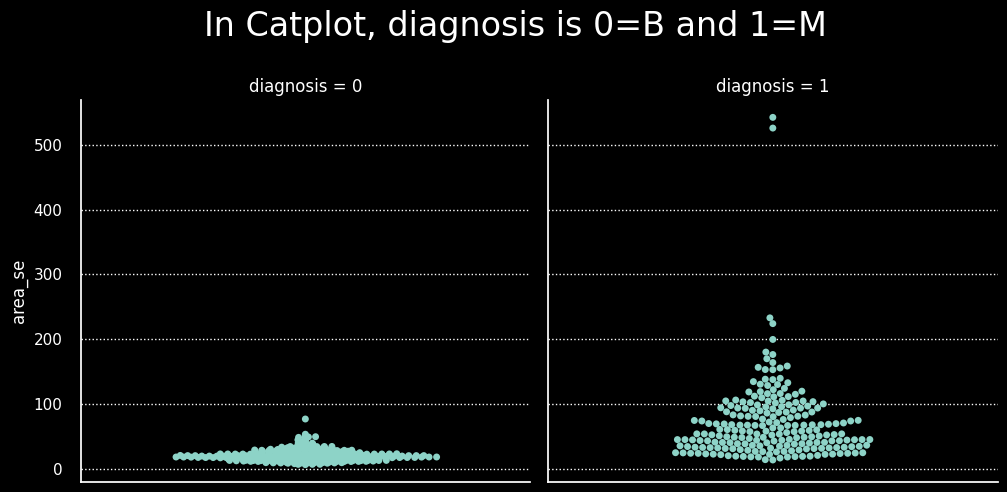

In [38]:
g = sns.catplot(
    data=df_data_processing, kind="swarm",
    y="area_se", col='diagnosis',
    s=5, 
)
# x="", color="diagnosis"

# g.set_xticklabels(["Relationship", "Single"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"In Catplot, diagnosis is 0=B and 1=M",
                  fontsize=24, fontdict={"weight": "bold"})

plt.show(g)

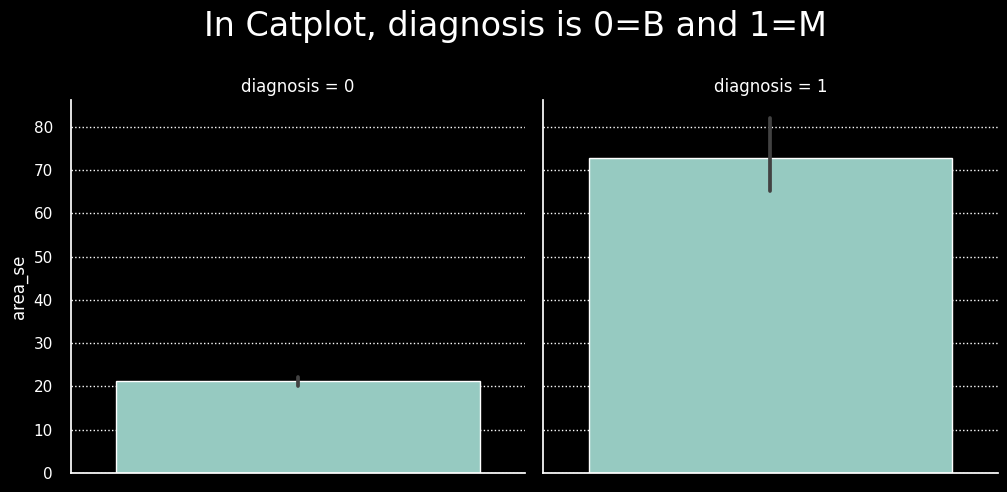

In [39]:
g = sns.catplot(
    data=df_data_processing, kind="bar",
    y="area_se", col='diagnosis', 
)


g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"In Catplot, diagnosis is 0=B and 1=M",
                  fontsize=24, fontdict={"weight": "bold"})


plt.show(g)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- Patients with benign tumors present smaller radius and tumor sizes in general.
></ul>
></div>

## Binary Classification

### Scaling Data

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>Then:
<br>- Lasso, Ridge, and Elastic Net regressions are powerful models, but they require normalization because the penalty coefficients are the same for all variables. We will use standardization in this case because it does not reduce the probability distribution of a variable if there are outliers, as is the case with normalization. But we will not take the 'diagnosis' variable from the standardization since it will take a discrete value when applying standardization. It will be taken in the format 0 and 1 coming from df_data_processing.
></ul>
></div>

In [40]:
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data_processing)

In [41]:
df_data_scaled = pd.DataFrame(df_data_scaled, columns = df_data_processing.columns)

### We divide the data set into features and the target of our model

In [42]:
X = df_data_scaled.drop(['diagnosis'], axis=1)
y = df_data_processing['diagnosis']

### Balance data application

In [43]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

## Comparing different Algorithms for Binary Classification on datasets

### Funtion to visualization matrix confusion in ploty

In [44]:
def matrix_confusion_plotly(cm, name):
    pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}

    x_matrix = ['False', 'True']
    y_matrix = ['True', 'False']

    z_text = [['TN', 'FP'],
              ['FN', 'TP']]

    # Display element name and prediction on hover

    hover_text = [['True Neg', 'False Pos'],
              ['False Neg', 'True Pos']]

    hover=[]
    for _ in range(len(z_text)):
        hover.append([i + '<br>' + 'Quantity  prediction: ' + str(j) + '<br>' + 'Percentage data in each quadrant: ' + str(round(j/np.sum(cm)*100, 2)) + '%' 
                      for i, j in zip(hover_text[_], cm[_])])

    fig = ff.create_annotated_heatmap(cm[::-1], x=x_matrix, y=y_matrix, annotation_text=z_text[::-1], text=hover[::-1], hoverinfo='text', colorscale=px.colors.diverging.RdBu[::-1], showscale=True)

    fig.update_layout(title_text=f'<i><b>Confusion matrix for {name}</b></i>')

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="white",size=14),
                            x=0.5,
                            y=-0.12,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="white",size=14),
                            x=-0.08,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    fig.update_layout(width=560, height=560)
    fig.show()

### Models

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>Then:
<br>- When the distribution of instances to classes is skewed, the precision fails to capture the actual performance of the algorithm. For this reason, we will use a class-balancing pipeline with the Smote library, but since there is no agreement on the order to use PCA or SMOTE due to the circumstantial nature of each machine learning case, I used the order that most of me read was appropriate: first SMOTE and second PCA. [link discussion on the issue in kaggle](https://www.kaggle.com/questions-and-answers/142430)
></ul>
></div>

  0%|          | 0/9 [00:00<?, ?it/s]

├──GridSearchCV of LogisticRegression:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('LogisticRegression',
                 LogisticRegression(C=0.046415888336127774, max_iter=10000,
                                    n_jobs=-1, random_state=42))])
	├──Best recall Score on Train:  0.9762790697674418
	├──Best Params:  {'LogisticRegression__C': 0.046415888336127774, 'LogisticRegression__max_iter': 10000, 'LogisticRegression__n_jobs': -1, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__random_state': 42, 'LogisticRegression__solver': 'lbfgs', 'pca__n_components': 6, 'pca__random_state': 42} 




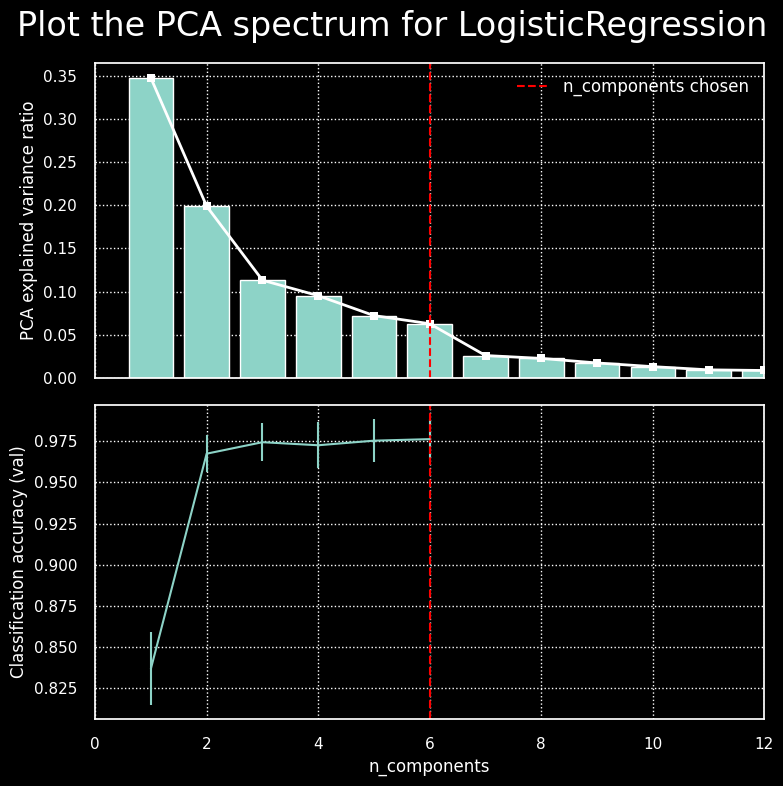

Visualize the Classification report and graphics Classification metrics of best estimator:


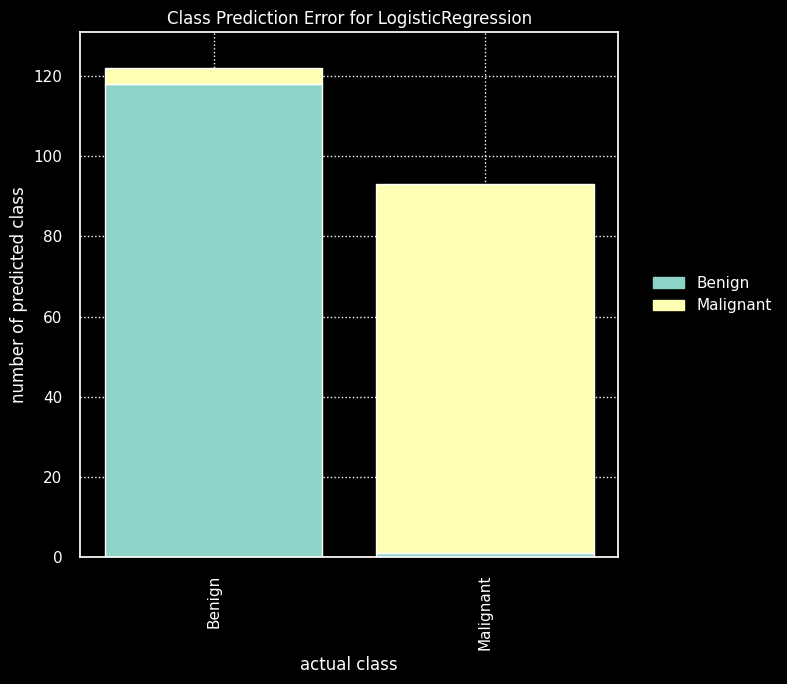

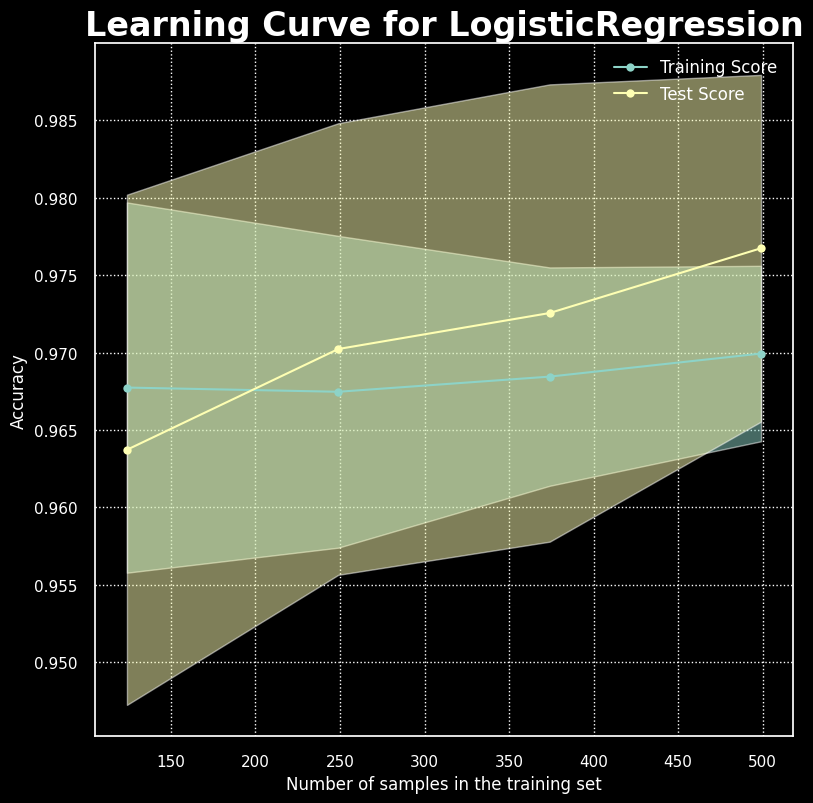




 _____________________________________________________________________________________ 



├──GridSearchCV of RandomForestClassifier:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=256,
                                        n_jobs=-1, random_state=42))])
	├──Best recall Score on Train:  0.9627906976744187
	├──Best Params:  {'RandomForestClassifier__criterion': 'gini', 'RandomForestClassifier__max_depth': 16, 'RandomForestClassifier__n_estimators': 256, 'RandomForestClassifier__n_jobs': -1, 'RandomForestClassifier__random_state': 42, 'pca__n_components': 6, 'pca__random_state': 42} 




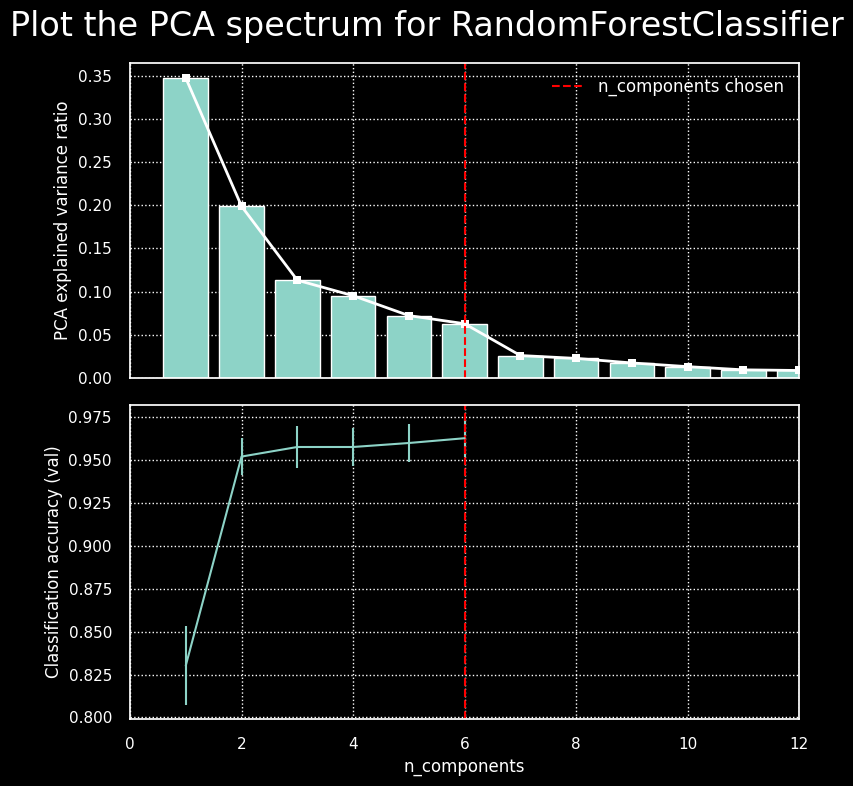

Visualize the Classification report and graphics Classification metrics of best estimator:


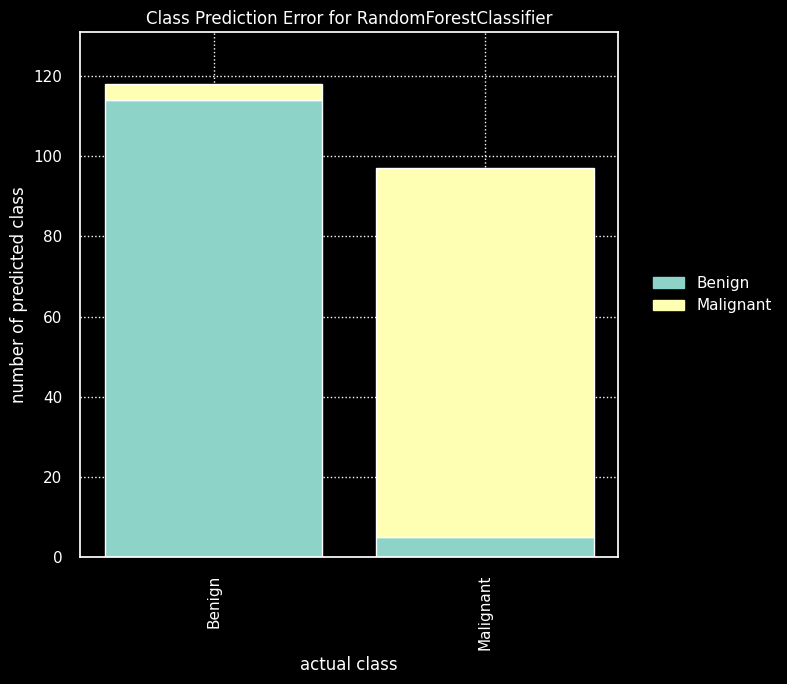

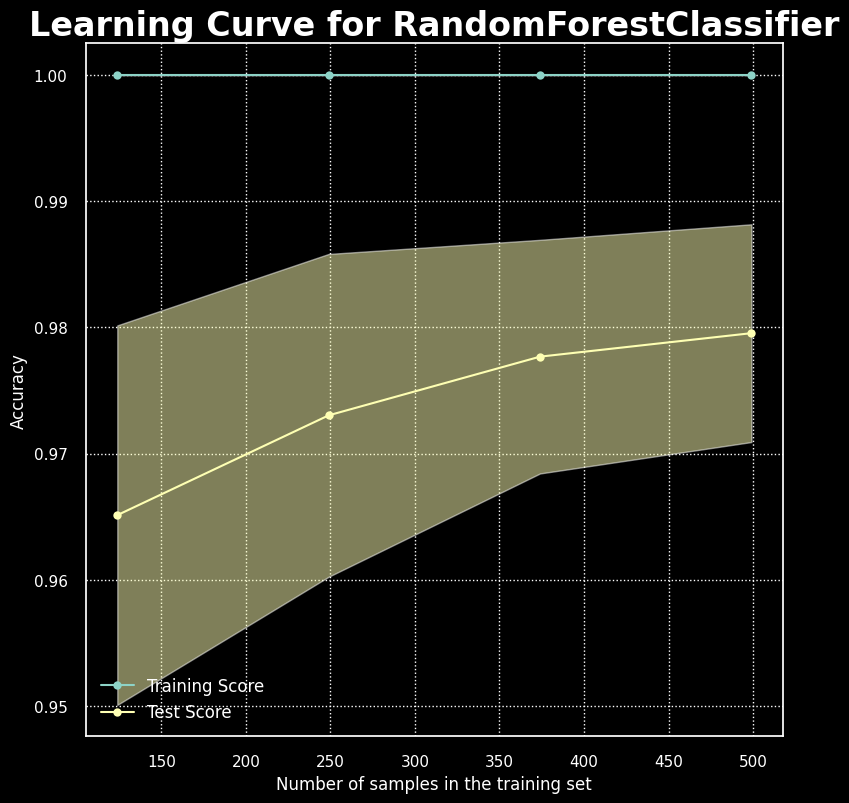




 _____________________________________________________________________________________ 



├──GridSearchCV of DecisionTreeClassifier:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=3, random_state=42)),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        random_state=42))])
	├──Best recall Score on Train:  0.9432558139534883
	├──Best Params:  {'DecisionTreeClassifier__criterion': 'entropy', 'DecisionTreeClassifier__max_depth': 8, 'DecisionTreeClassifier__random_state': 42, 'pca__n_components': 3, 'pca__random_state': 42} 




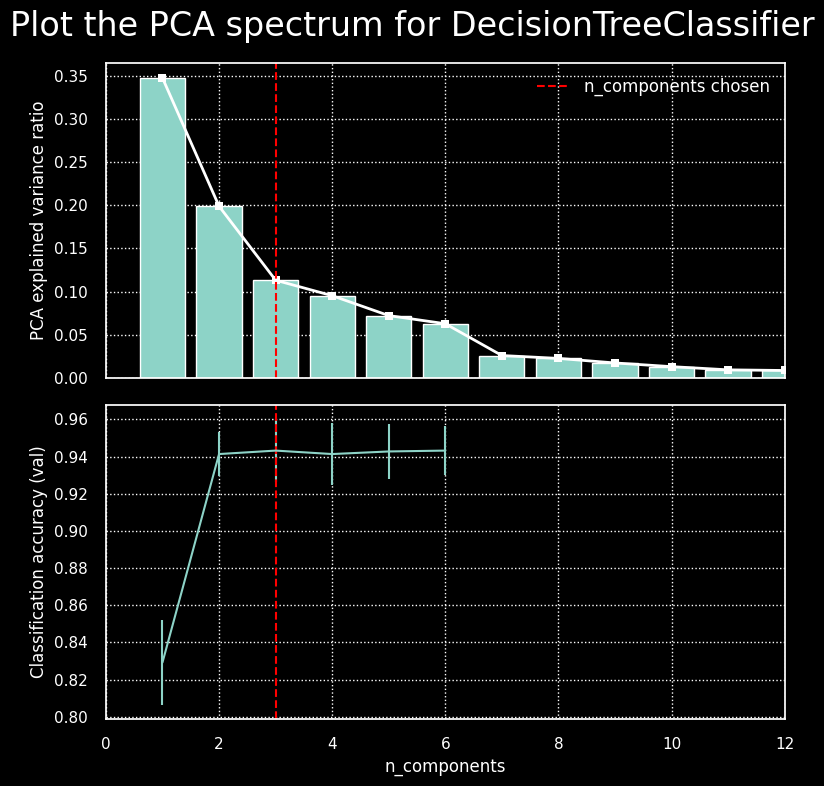

Visualize the Classification report and graphics Classification metrics of best estimator:


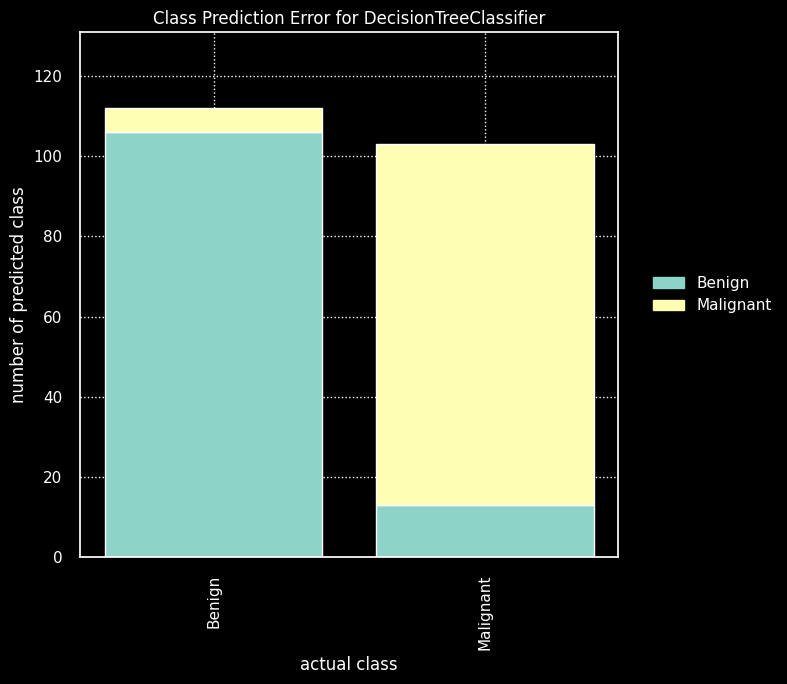

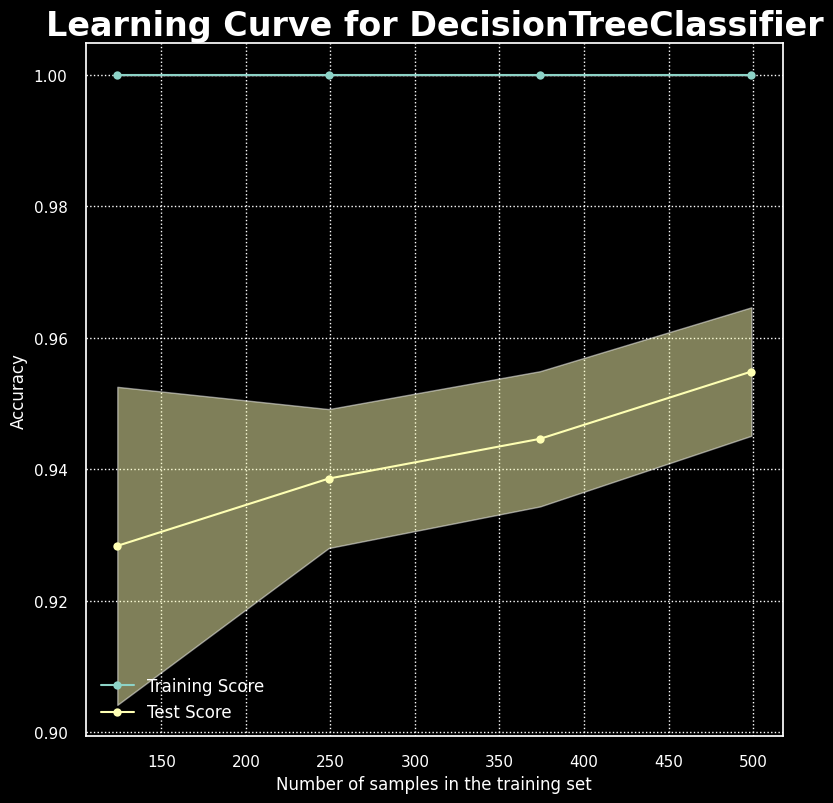

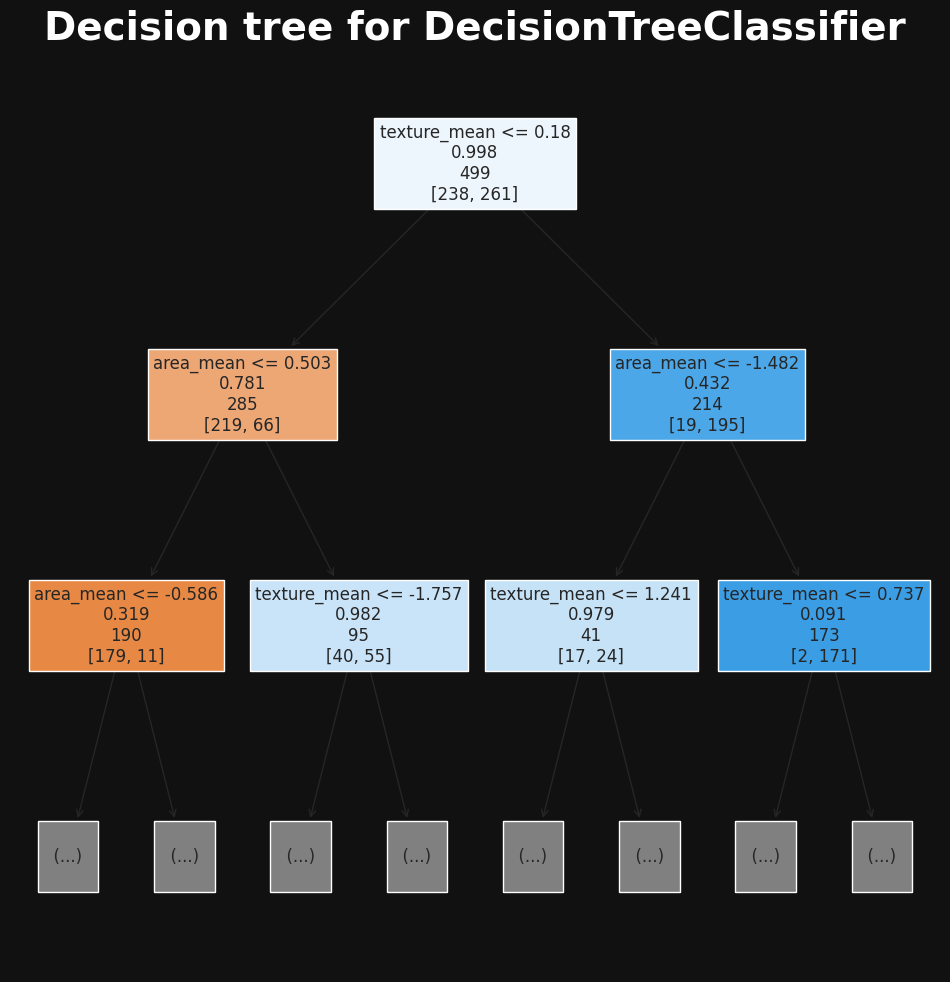




 _____________________________________________________________________________________ 



├──GridSearchCV of KNeighborsClassifier:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('KNeighborsClassifier',
                 KNeighborsClassifier(n_jobs=-1, weights='distance'))])
	├──Best recall Score on Train:  0.9809302325581395
	├──Best Params:  {'KNeighborsClassifier__n_jobs': -1, 'KNeighborsClassifier__n_neighbors': 5, 'KNeighborsClassifier__weights': 'distance', 'pca__n_components': 6, 'pca__random_state': 42} 




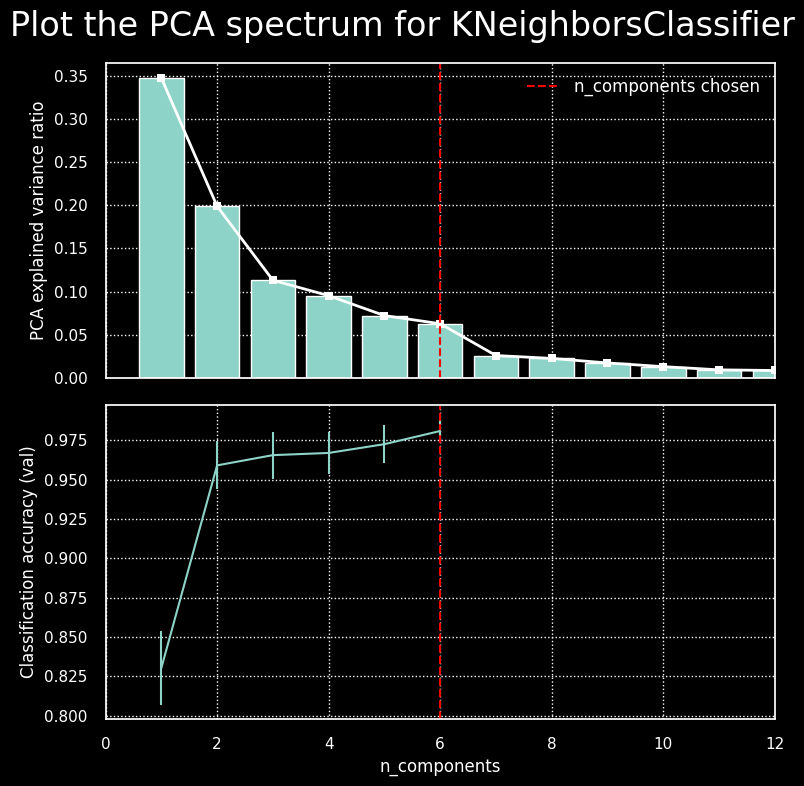

Visualize the Classification report and graphics Classification metrics of best estimator:


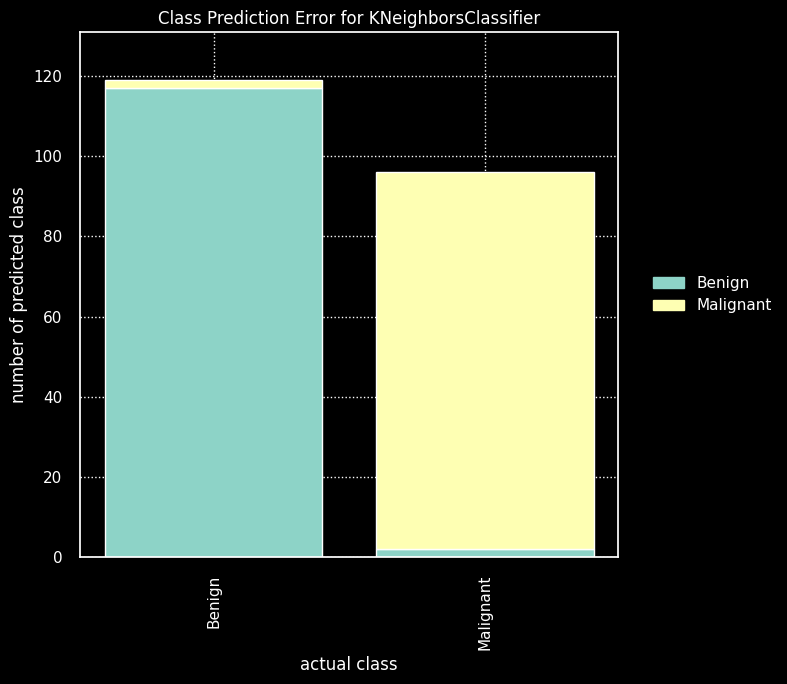

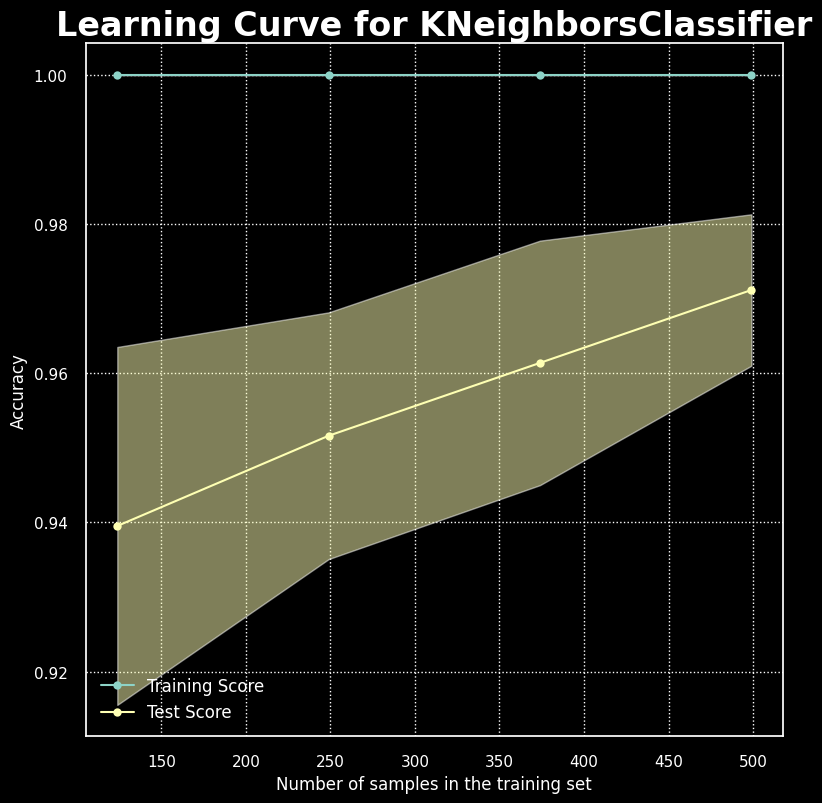




 _____________________________________________________________________________________ 



├──GridSearchCV of SupportVectorMachine:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('SupportVectorMachine',
                 SVC(kernel='linear', probability=True, random_state=42))])
	├──Best recall Score on Train:  0.9767441860465116
	├──Best Params:  {'SupportVectorMachine__kernel': 'linear', 'SupportVectorMachine__probability': True, 'SupportVectorMachine__random_state': 42, 'pca__n_components': 6, 'pca__random_state': 42} 




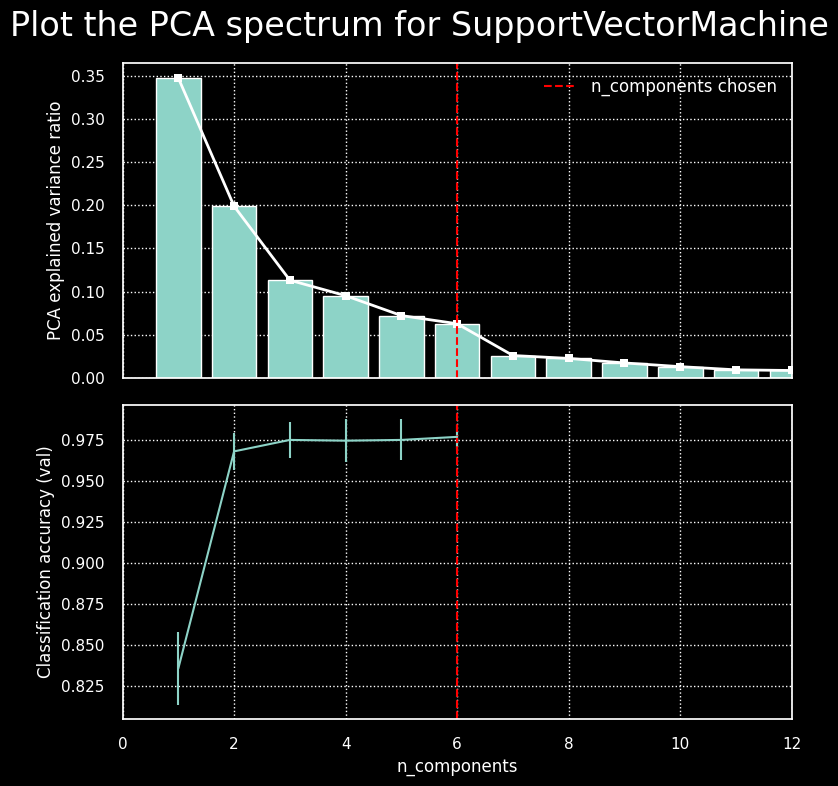

Visualize the Classification report and graphics Classification metrics of best estimator:


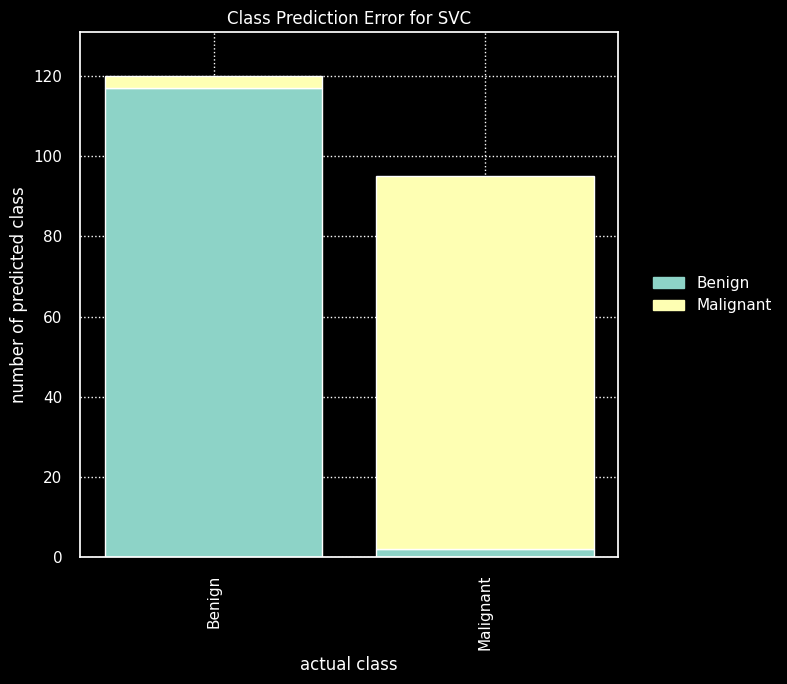

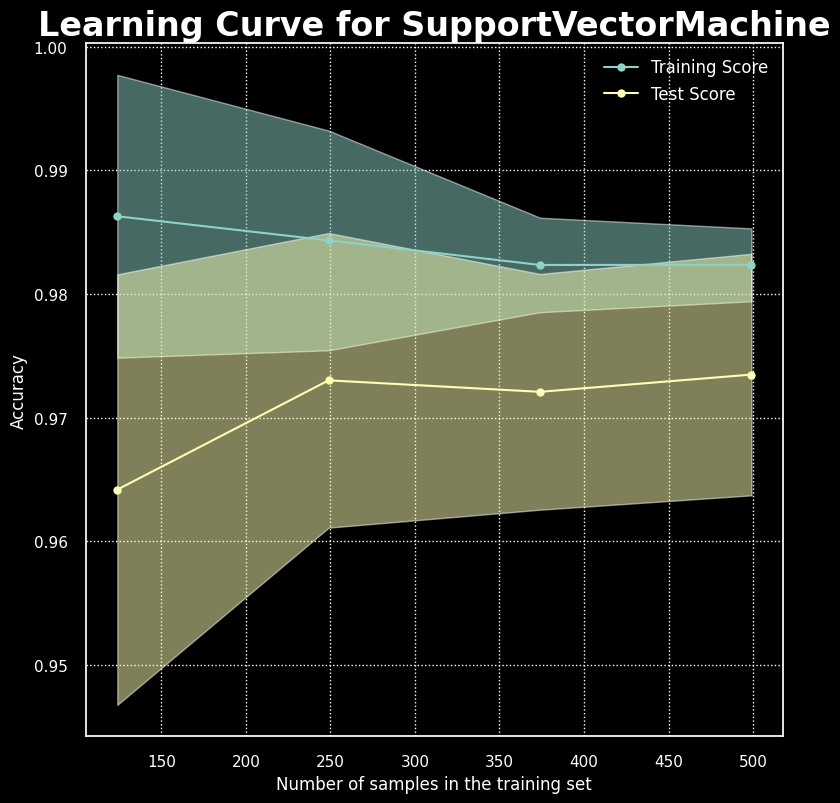




 _____________________________________________________________________________________ 



├──GridSearchCV of GaussianNaiveBayes:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('GaussianNaiveBayes', GaussianNB())])
	├──Best recall Score on Train:  0.9237209302325582
	├──Best Params:  {'pca__n_components': 6, 'pca__random_state': 42} 




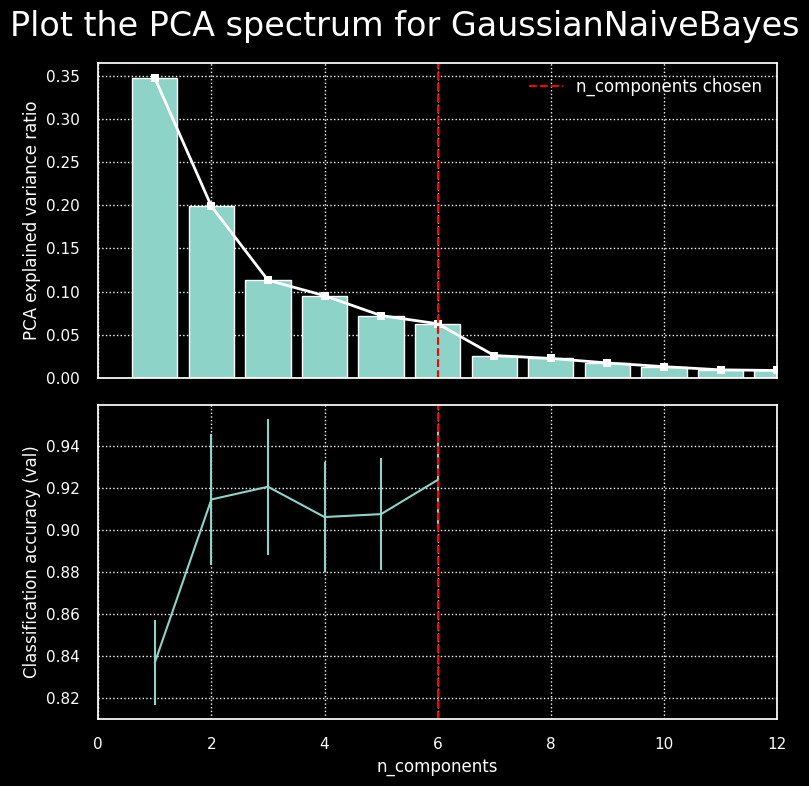

Visualize the Classification report and graphics Classification metrics of best estimator:


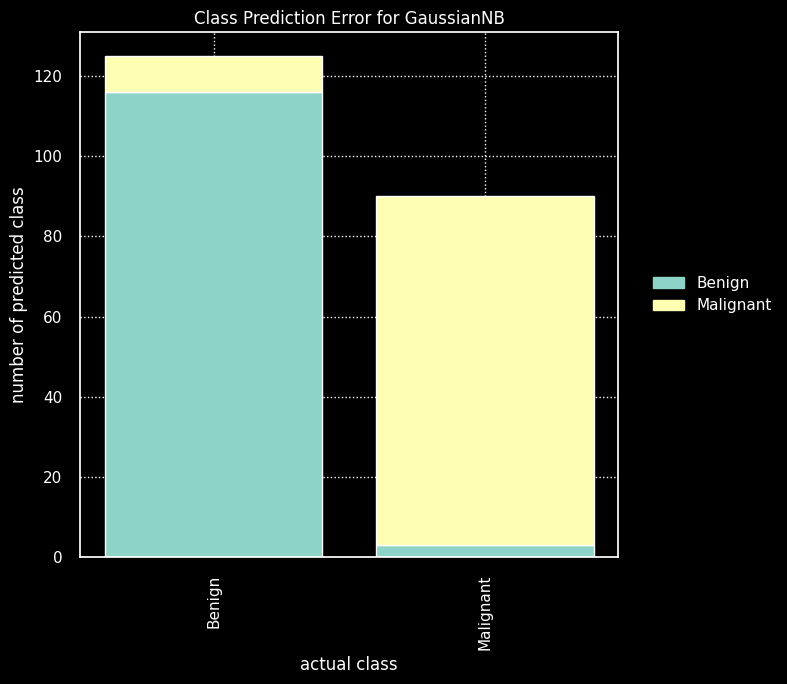

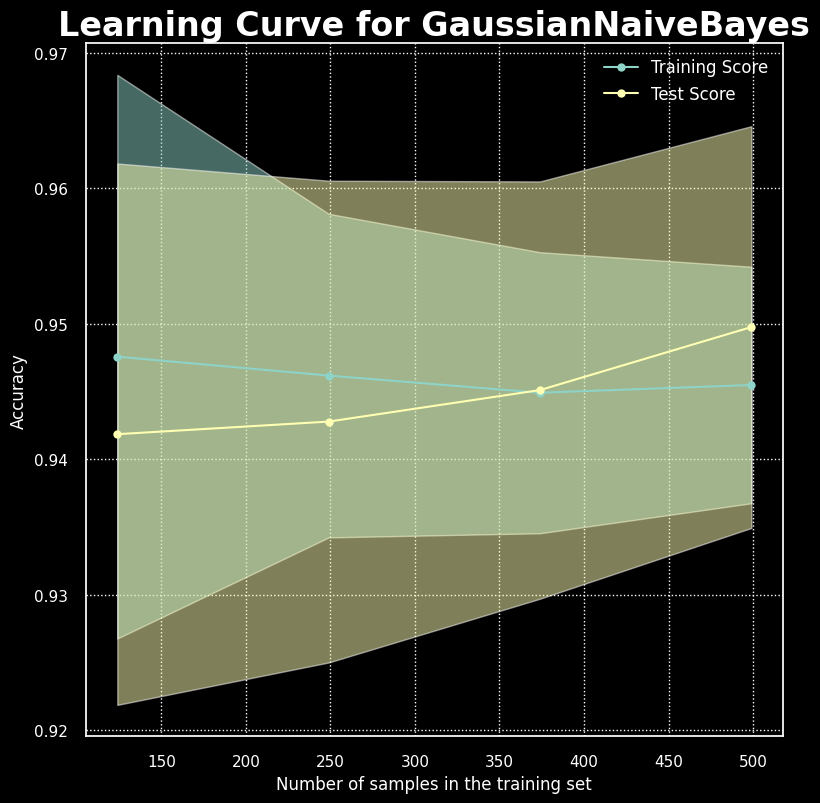




 _____________________________________________________________________________________ 



├──GridSearchCV of BaggingClassifier:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=5, random_state=42)),
                ('BaggingClassifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                    max_depth=8,
                                                                    random_state=42),
                                   max_samples=0.5, n_estimators=20,
                                   n_jobs=-1))])
	├──Best recall Score on Train:  0.9548837209302325
	├──Best Params:  {'BaggingClassifier__max_features': 1.0, 'BaggingClassifier__max_samples': 0.5, 'BaggingClassifier__n_estimators': 20, 'BaggingClassifier__n_jobs': -1, 'pca__n_components': 5, 'pca__random_state': 42} 




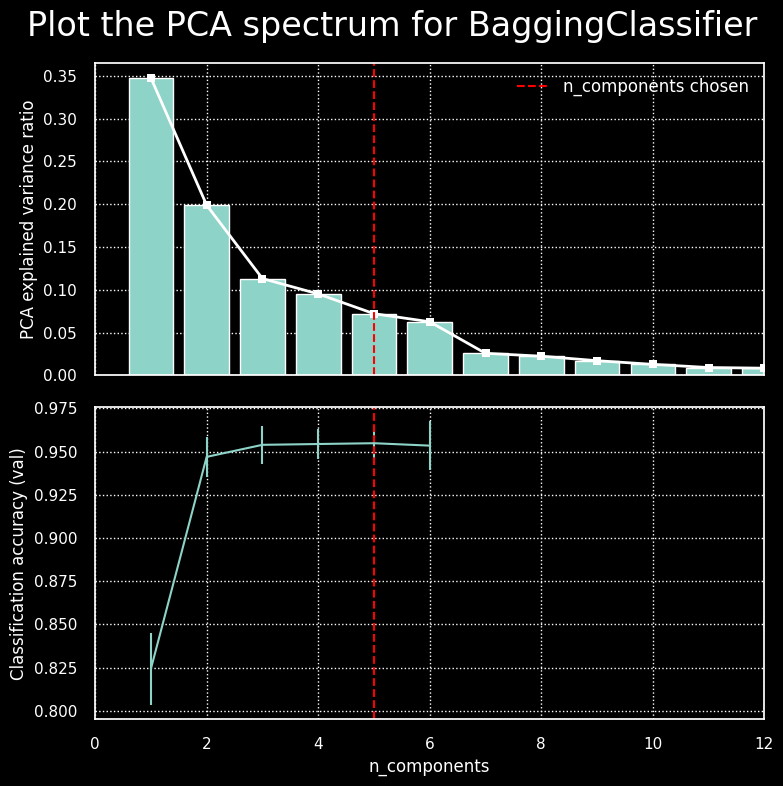

Visualize the Classification report and graphics Classification metrics of best estimator:


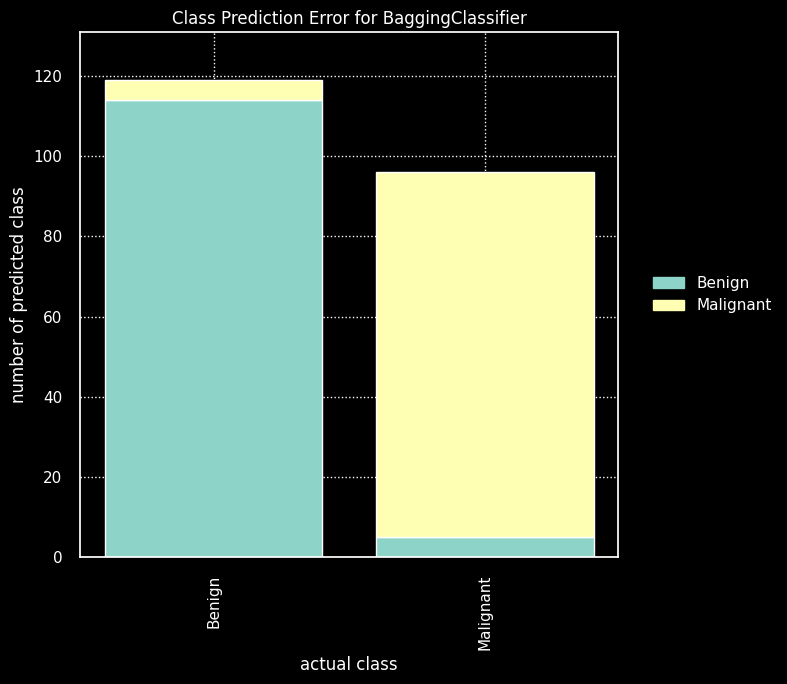

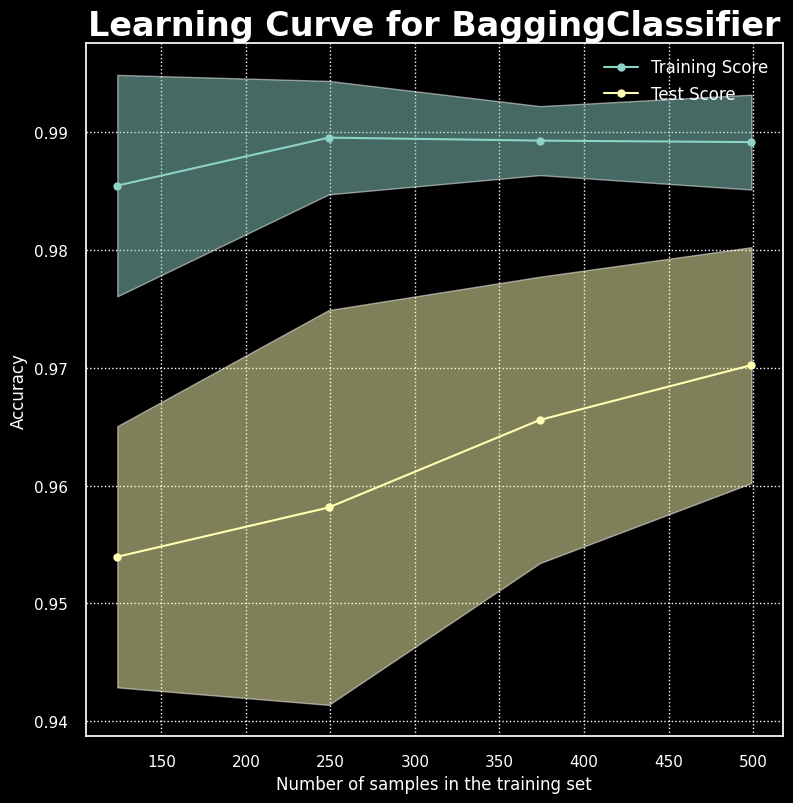




 _____________________________________________________________________________________ 



├──GridSearchCV of BoostingDecisionTree:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=3, random_state=42)),
                ('BoostingDecisionTree',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                     max_depth=8,
                                                                     random_state=42),
                                    learning_rate=0.6, n_estimators=10,
                                    random_state=42))])
	├──Best recall Score on Train:  0.9432558139534883
	├──Best Params:  {'BoostingDecisionTree__learning_rate': 0.6, 'BoostingDecisionTree__n_estimators': 10, 'BoostingDecisionTree__random_state': 42, 'pca__n_components': 3, 'pca__random_state': 42} 




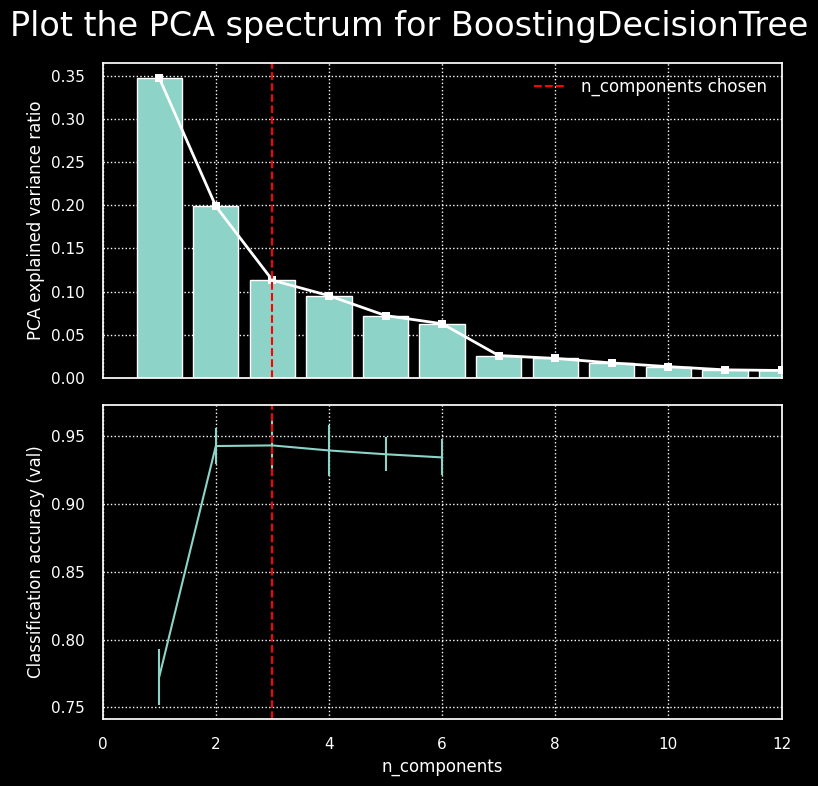

Visualize the Classification report and graphics Classification metrics of best estimator:


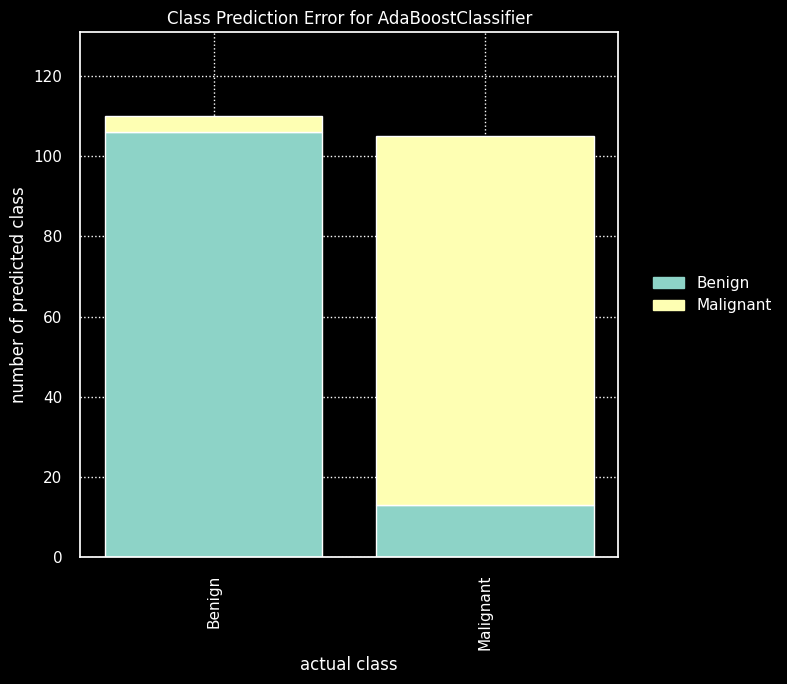

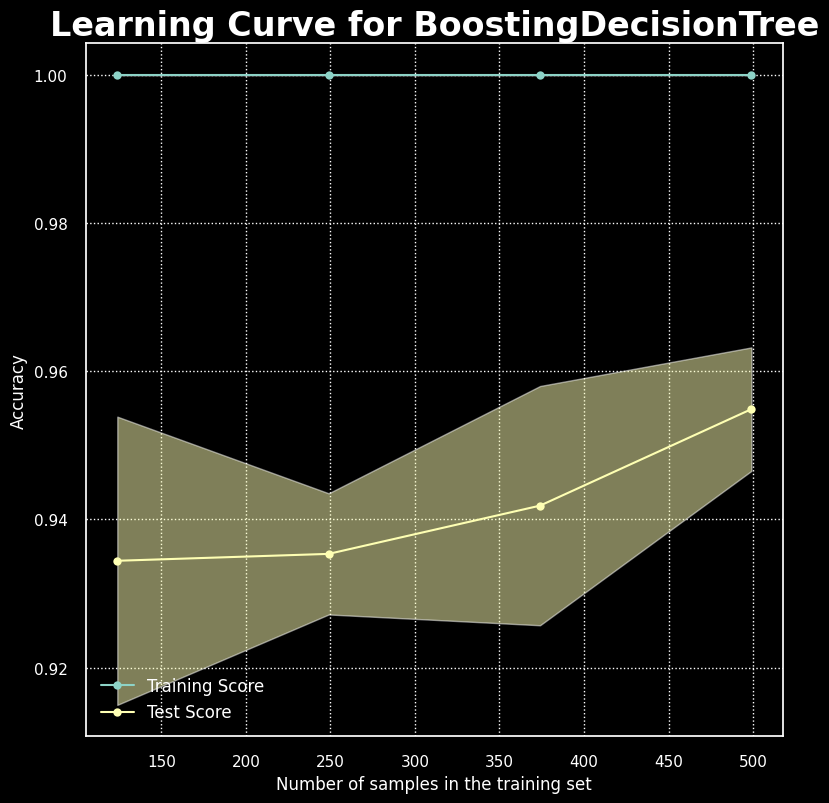




 _____________________________________________________________________________________ 



├──GridSearchCV of VotingClassifier:
	├──Best Estimator:  Pipeline(steps=[('pca', PCA(n_components=6, random_state=42)),
                ('VotingClassifier',
                 VotingClassifier(estimators=[('gnb', GaussianNB()),
                                              ('lr',
                                               LogisticRegression(C=0.046415888336127774,
                                                                  max_iter=10000,
                                                                  n_jobs=-1,
                                                                  random_state=42)),
                                              ('svm',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42))],
                              

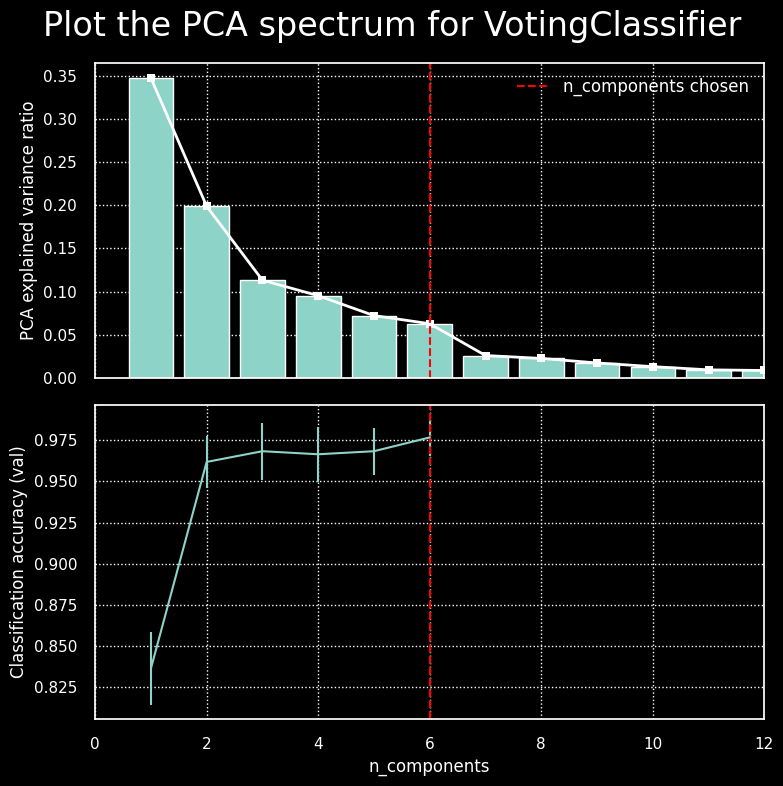

Visualize the Classification report and graphics Classification metrics of best estimator:


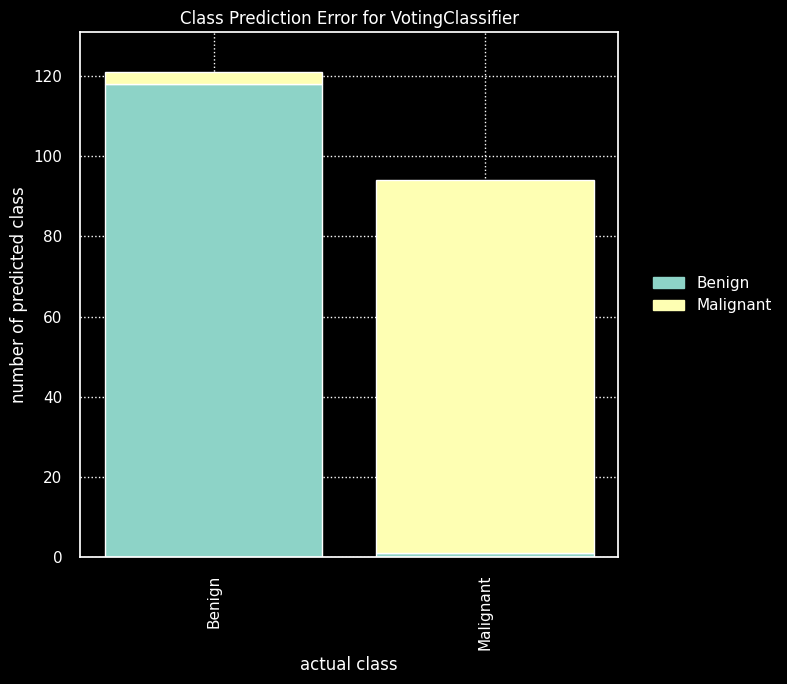

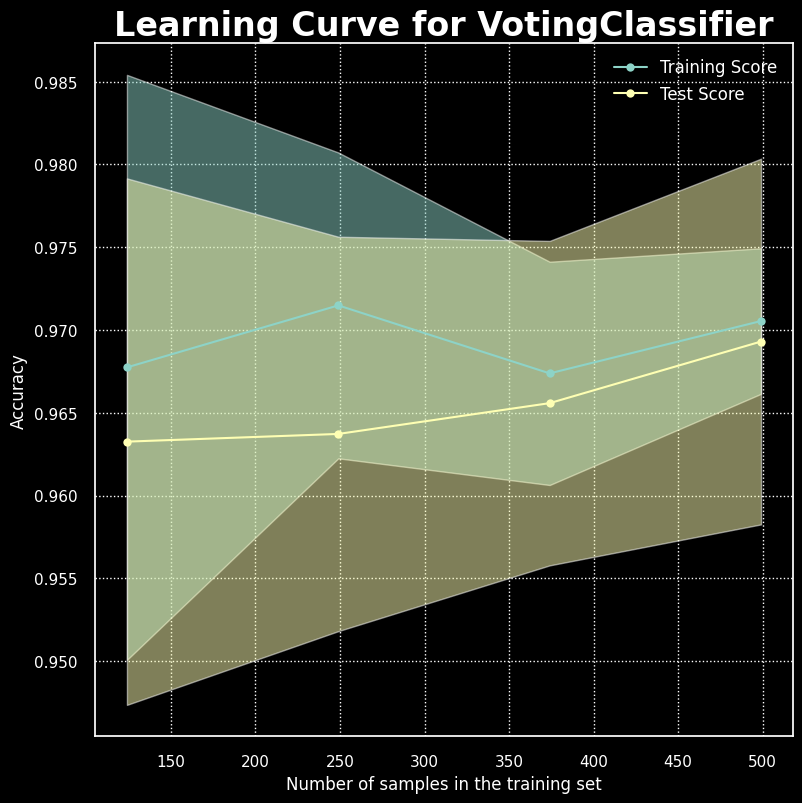




 _____________________________________________________________________________________ 





In [45]:
import warnings
warnings.filterwarnings("ignore")

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# method used a cross-validation procedure
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)


# Grid for classifier
reg_classifier = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachine': SVC(),
    'GaussianNaiveBayes': GaussianNB(),
    'BaggingClassifier': None,
    'BoostingDecisionTree': None,
    'VotingClassifier': None
}


params = {
    'pca':
        {
         "pca__n_components": np.arange(1, 7, 1),
         'pca__random_state': [42]
        },
    'LogisticRegression':
        {
         "LogisticRegression__C": np.logspace(-4, 4, 4),
         "LogisticRegression__penalty": ['l1', 'l2'],
         "LogisticRegression__solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
         'LogisticRegression__max_iter': [10000],
         'LogisticRegression__random_state': [42],
         'LogisticRegression__n_jobs': [-1],
        },
    'RandomForestClassifier':
        {
         "RandomForestClassifier__criterion": ['entropy', 'gini'],
         "RandomForestClassifier__n_estimators": [64, 128, 256],
         "RandomForestClassifier__max_depth": [2, 4, 8, 16, 36, 64],
         'RandomForestClassifier__random_state': [42],
         'RandomForestClassifier__n_jobs': [-1],
        },
    'DecisionTreeClassifier':
        {"DecisionTreeClassifier__criterion": ['entropy', 'gini'],
         "DecisionTreeClassifier__max_depth": [2, 4, 8, 16, 36, 64],
         'DecisionTreeClassifier__random_state': [42],
        },
    'KNeighborsClassifier':
        {
         'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9, 12, 15, 19, 24],
         'KNeighborsClassifier__weights': ['uniform', 'distance'],
         'KNeighborsClassifier__n_jobs': [-1],
        },
    'SupportVectorMachine':
        {
         'SupportVectorMachine__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
         'SupportVectorMachine__random_state': [42],
         'SupportVectorMachine__probability': [True],
        },
    'GaussianNaiveBayes':
        {},
    'BaggingClassifier':
        {
         'BaggingClassifier__max_samples': [0.5],
         'BaggingClassifier__max_features': [1.0],
         'BaggingClassifier__n_estimators': [20],
         'BaggingClassifier__n_jobs': [-1],
        },
    'BoostingDecisionTree':
        {
         'BoostingDecisionTree__n_estimators': [10],
         'BoostingDecisionTree__learning_rate': [0.6],
         'BoostingDecisionTree__random_state': [42],
        },
    'VotingClassifier':
        {
         'VotingClassifier__voting': ['soft', 'hard'],
         'VotingClassifier__n_jobs': [-1],
        },
}

# Grid for LearningCurveDisplay
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.25, 1.0, 4),
    "cv": ShuffleSplit(n_splits=10, test_size=0.3, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
    "random_state": 42
}


# Dict and list to save score to models
model_best = {}
pca_best = {}
models_names = []
test_scores = []
train_scores = []



###################################### Models deployment ###########################################



for name, reg in tqdm(reg_classifier.items()):
    pipe = Pipeline(steps=[("pca", pca), (name, reg)])
    grid_reg = GridSearchCV(pipe, {**params.get('pca'), **params.get(name)}, n_jobs=-1, cv=cv, scoring='accuracy').fit(X, y)
    score = np.abs(grid_reg.best_score_)

    #Getting the best estimators, score & parameters
    GridSearchCV
    print(f'├──GridSearchCV of {name}:')
    print(f'\t├──Best Estimator:  {grid_reg.best_estimator_}')
    print(f'\t├──Best recall Score on Train:  {grid_reg.best_score_}')
    print(f'\t├──Best Params:  {grid_reg.best_params_} \n\n')


    # Best model and pca for comparative Roc Curves
    model_best[name] = grid_reg.best_estimator_.named_steps[name]
    pca_best[name] = grid_reg.best_estimator_.named_steps['pca'].n_components



    # Save the best algorithms for use in the BaggingClassifier, BoostingDecisionTree and VotingClassifier
    if name == 'LogisticRegression':
        best_params_logistic_regression = grid_reg.best_estimator_.named_steps['LogisticRegression'].get_params()
    if name == 'DecisionTreeClassifier':
        best_params_decision_tree_classifier = grid_reg.best_estimator_.named_steps['DecisionTreeClassifier'].get_params()
        reg_classifier['BaggingClassifier'] = BaggingClassifier(DecisionTreeClassifier(**best_params_decision_tree_classifier))
        reg_classifier['BoostingDecisionTree'] = AdaBoostClassifier(DecisionTreeClassifier(**best_params_decision_tree_classifier))
    if name == 'SupportVectorMachine':
        best_params_support_vector_machine = grid_reg.best_estimator_.named_steps['SupportVectorMachine'].get_params()
    if name == 'GaussianNaiveBayes':
        best_params_gaussian_naive_bayes = grid_reg.best_estimator_.named_steps['GaussianNaiveBayes'].get_params()
        reg_classifier['VotingClassifier'] = VotingClassifier(estimators=[
            ('gnb', GaussianNB(**best_params_gaussian_naive_bayes)),
            ('lr', LogisticRegression(**best_params_logistic_regression)),
            ('svm', SVC(**best_params_support_vector_machine))
        ])



    # Plot the PCA spectrum
    pca.fit(X)
    mpl.rcParams['text.color'] = 'white'
    plt.style.use('dark_background')
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
    ax0.bar(
        np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_
    )
    ax0.set_ylabel("PCA explained variance ratio")
    ax0.plot(
        np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "w-s", linewidth=2
    )
    ax0.axvline(
        grid_reg.best_estimator_.named_steps["pca"].n_components,
        linestyle="--", color ='red',
        label="n_components chosen",
    )
    ax0.legend(prop=dict(size=12))

    ## For each number of components, find the best classifier results
    results = pd.DataFrame(grid_reg.cv_results_)
    components_col = "param_pca__n_components"
    best_clfs = results.groupby(components_col).apply(
        lambda g: g.nlargest(1, "mean_test_score")
    )
    best_clfs.plot(
        x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
    )
    ax1.set_ylabel("Classification accuracy (val)")
    ax1.set_xlabel("n_components")
    ax1.axvline(
        grid_reg.best_estimator_.named_steps["pca"].n_components,
        linestyle="--", color ='red',
        label="n_components chosen",
    )
    ax0.legend(prop=dict(size=12))

    plt.xlim(0, 12)
    plt.suptitle(f"Plot the PCA spectrum for {name}",
                      fontsize=24, fontdict={"weight": "bold"})
    plt.tight_layout()
    plt.show()



    # Analysis best estimator of GridSearchCV
    print(f'Visualize the Classification report and graphics Classification metrics of best estimator:')

    # PCA Best Model
    pca_b = PCA(n_components=grid_reg.best_estimator_.named_steps['pca'].n_components, random_state=42)
    pca_b.fit(X)
    X_pca = pca_b.transform(X)

    # Split with 'X' and 'y' balanced and pca_components_best of 'X'
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)


    # Training our best model and prediction
    model = grid_reg.best_estimator_.named_steps[name].fit(X_train, y_train)
    prediction = model.predict(X_test)


    # View report with pro style
    df = pd.DataFrame(classification_report(y_test,
                                            prediction, 
                                            digits=2,
                                            output_dict=True)).T
    df['support'] = df.support.apply(int)

    display(df.style.background_gradient(cmap='coolwarm',
                                 subset=pd.IndexSlice['0':'1', :'f1-score']))


    # Display table results Test_Score and Train_Score for all models
    models_names.append(name)
    test_scores.append(model.score(X_test, y_test)*100)
    train_scores.append(model.score(X_train, y_train)*100)



    # Function plot matrix confusion with plotly
    cm = confusion_matrix(y_test, prediction, labels=model.classes_)
    matrix_confusion_plotly(cm, name)


    # Class Prediction Error of result LogisticRegression# Class Prediction Error of result LogisticRegression
    ## Instantiate the classification model and visualizer
    fig, ax = plt.subplots(figsize=(9,7))
    visualizer = ClassPredictionError(
        grid_reg.best_estimator_.named_steps[name], classes=['Benign', 'Malignant']
    )
    ## Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    ## Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    ## Draw visualization
    visualizer.show()


    # Learning Curve visualization
    fig, ax = plt.subplots(figsize=(9,9))
    LearningCurveDisplay.from_estimator(grid_reg.best_estimator_.named_steps[name], **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"], fontsize=12)
    plt.title(f"Learning Curve for {name}", fontsize=24, fontdict={"weight": "bold"})
    plt.show()


#     # ROC Curve single
#     fig, ax = plt.subplots(figsize=(9,9))
#     clf = grid_reg.best_estimator_.fit(X_train, y_train)
#     RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)
#     plt.title(f"ROC Curve for {name}",
#                   fontsize=24, fontdict={"weight": "bold"})
#     plt.show()


    # Plot a decision tree
    if name == 'DecisionTreeClassifier':
        mpl.rcParams['text.color'] = 'black'
        sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
        fig, ax = plt.subplots(figsize=(12, 12), facecolor='k')
        plot_tree(grid_reg.best_estimator_.named_steps[name], feature_names=list(X.columns), label=list(np.unique(y)), filled=True, fontsize=12, max_depth= 2, ax=ax)
        plt.title(f"Decision tree for {name}", color='white', fontsize=28, fontweight='bold')
        plt.show()

    print('\n' * 3, '_' * 85, '\n' * 3)

## Evaluation of Results

In [48]:
def RocCurves_plotly(model, n_pca):
    # Create an empty figure, and iteratively add new lines
    # every time we compute a new class
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for name, reg in model.items():
        
        # PCA Best Model
        pca_b = PCA(n_components=n_pca[name], random_state=42)
        pca_b.fit(X)
        X_pca = pca_b.transform(X)
        
        
        # split 'X' e 'y' balanceaddos and pca_components_best
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=5)
    
        # Fit the model
        reg.fit(X_train, y_train)
        y_score = reg.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        auc_score = roc_auc_score(y_test, y_score)

        name = f"{name} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout( 
        title="Roc Curves all best classifier",
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
    )
    fig.show()

In [49]:
# plot RocCurves for best classifier
RocCurves_plotly(model_best, pca_best)

dict_models_scores = {'Model': models_names, 'Test Score': test_scores, 'Train Score': train_scores} 

df = pd.DataFrame(dict_models_scores)


# plot bar comparative scores test and train for best classifier
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df['Test Score'],
    x=df['Model'],
    name='Test Scores',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    y=df['Train Score'],
    x=df['Model'],
    name='Train Scores',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="Bar comparative scores of test and train for best classifier",)

fig.update_yaxes(tickfont=dict(family='Arial', size=14), automargin='height')
fig.update_xaxes(tickfont=dict(family='Arial', size=14), automargin='height')
fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Overall conclusion</div>
><ul style="font-size:16px;">
>
>At the end of our EDA and clustering, we obtained:
<br>- After the elimination of variables with Quasi-collinearity, data scaling, class balancing, dimensionality reduction, almost any binary classification model has an excellent performance, highlighting some over others for the particular case of diagnosis of breast tissues of future patients with tumors.
></ul>
></div>

---

<p>
  Enlace to
  <a
    href="https://github.com/AAZG/Binary-Classification-Implementation-in-Breast-Cancer"
    title="Fork to repository"
    >project's GitHub repository</a
  >.
</p>

---
*Contact:*
---

<a href="https://www.linkedin.com/in/aazg"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3992/3992606.png"  width="55" height="55" target="_blank" alt="Go to my Linkedin profile" title="Go to my Linkedin profile"></a>

<a href="https://github.com/AAZG"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/5968/5968846.png"  width="55" height="55" target="_blank" alt="Go to my Github profile" title="Go to my Github profile"></a>

<a href="https://www.kaggle.com/alfonsozapata"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3665/3665933.png"  width="55" height="55" target="_blank" alt="Go to my Kaggle profile" title="Go to my Kaggle profile"></a>

<a href="https://deepnote.com/@aazg"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3665/3665927.png"  width="55" height="55" target="_blank" alt="Go to my Deepnote profile" title="Go to my Deepnote profile"></a>

<a href="https://aazg.github.io/#my-work"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/351/351456.png"  width="55" height="55" target="_blank" alt="View my portfolio in my Web page" title="View my portfolio in my Web page"></a>

<a href="https://api.whatsapp.com/send?phone=584128869169&text=Hi,%20i%27m%20insterested%20on%20your%20services"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/4423/4423697.png"  width="55" height="55" target="_blank" alt="Start a Whatsapp conversation with me" title="Start a Whatsapp conversation with me"></a>

<a href="mailto:aazg24@gmail.com"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png"  width="55" height="55" target="_blank" alt="Start a Mail conversation with me" title="Start a Mail conversation with me"></a>
    
<a href="https://twitter.com/AlfonsoZapata21"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/1384/1384065.png"  width="55" height="55" target="_blank" alt="Go to my Twitter profile" title="Go to my Twitter profile"></a>

<a href="https://www.instagram.com/alfonsoandreszapataguzman/"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/1409/1409946.png"  width="55" height="55" target="_blank" alt="Go to my Instagram profile" title="Go to my Instagram profile"></a>




*Let’s change the world, Together!*

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1a787f4-e09a-491d-b983-72959c4a6927' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>